In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# step 1:setup and indicators


In [2]:
#stock symbol and time period
stock_symbol = 'NVDA'
short_term_sma = 50
long_term_sma = 200

 #downloading stock
data = yf.download(stock_symbol,start = '2020-01-01',end = '2022-12-31')
    


[*********************100%%**********************]  1 of 1 completed


In [3]:
#snapshot of data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.749306,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.792953,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.039501,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.754272,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.866348,27710800


<Axes: xlabel='Date'>

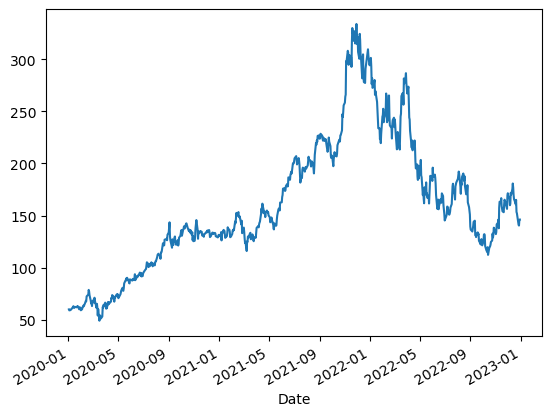

In [4]:
#Snashop of data visualizatio
data['Close'].plot()

In [5]:
#calculating SMAs

data['SMA_short'] = data['Close'].rolling(short_term_sma).mean()

data['SMA_long'] = data['Close'].rolling(long_term_sma).mean()

<Axes: xlabel='Date'>

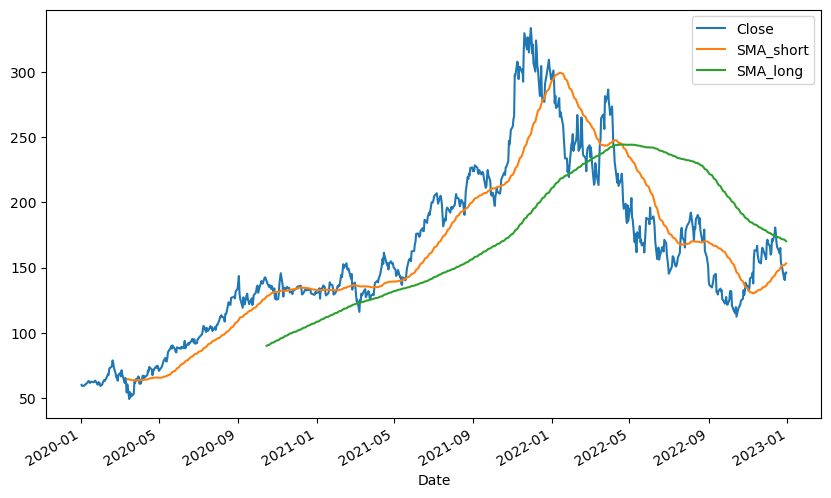

In [6]:
#ploting smas and close

data[['Close','SMA_short','SMA_long']].plot(figsize = (10,6))

# Generating trading signals based on crossings of SMAs

<Axes: xlabel='Date'>

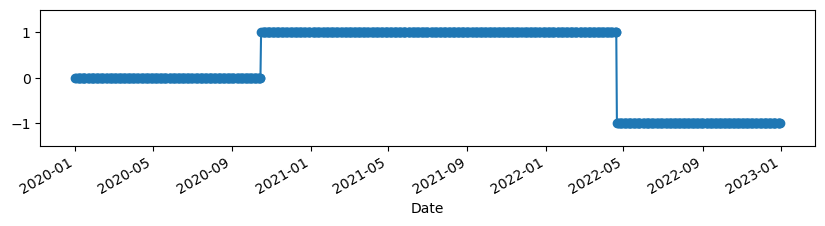

In [12]:
#signing a signal column
data['signal'] = 0

#generating trading signals based on SMAs crossing over
data['signal'] = np.where(data['SMA_short'].shift(1) > data['SMA_long'].shift(1), 1,
                          np.where(data['SMA_short'].shift(1) < data['SMA_long'].shift(1), -1, 0))  #sell signal
#plotting crossing signals
data['signal'].plot(ylim=[-1.5, 1.5], figsize=(10, 2), marker='o')


In [13]:
data['signal']

Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
             ..
2022-12-23   -1
2022-12-27   -1
2022-12-28   -1
2022-12-29   -1
2022-12-30   -1
Name: signal, Length: 756, dtype: int32

# backtesting and evaluation

In [25]:
#calculating daily returns based on trading signals

data['returns'] = data['Close'].pct_change()

data['strategy_return'] = data['signal'].shift(1)*data['returns']

#calculating cumulative returns

data['cum_return'] = (data["strategy_return"]+1).cumprod()

#calculating other perfomance matrics

total_return = data['cum_return'][-1]-1

annual_return = (1 + total_return)**(252/len(data)) -1

max_drawdown = 1-(data['cum_return'].cummax()).min()

#print performance metrics

print('Total Return:',total_return)

print('Annualized return:',annual_return)

print('Max Drawdown:',max_drawdown)

Total Return: 0.5367323976894594
Annualized return: 0.15398301256684976
Max Drawdown: 0.0


C:\Users\shadr\AppData\Local\Temp\ipykernel_11516\3350406030.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = data['cum_return'][-1]-1


# COMPARE WITH BENCHMARK:S&P500

In [27]:

# Download S&P 500 data
sp500 = yf.download('^GSPC', start='2020-01-01', end='2022-12-31')




[*********************100%%**********************]  1 of 1 completed


In [28]:
# Calculate S&P 500 returns
sp500_returns = sp500['Adj Close'].pct_change().dropna()


In [29]:
# Calculate total return

total_return_sp500 = sp500_returns.sum()

In [30]:

# Calculate annualized return (assuming 252 trading days)

annualized_return_sp500 = ((1 + total_return_sp500) ** (252 / len(sp500_returns))) - 1


In [31]:
# Calculate total return

total_return_sp500 = sp500_returns.sum()


In [32]:
# Print the results
print(f"Total Return S&P 500: {total_return_sp500}")

print(f"Annualized Return S&P 500: {annualized_return_sp500}")

Total Return S&P 500: 0.26189297992264504
Annualized Return S&P 500: 0.0807339046891955


# Summary and Comparison

## Total Return:
#### Strategy Investment: 0.5367
#### S&P 500: 0.2619

## Annualized Return:
#### Strategy Investment: 0.1540
#### S&P 500: 0.0807
#### strategy investment outperformed the S&P 500 in terms of both total return and annualized return. 
### Over the specified period, your investment generated higher returns compared to the S&P 500 index.